In [1]:
!pip install Sastrawi


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
dir = "D:\ANISA\Kuliah\Tugas\Semester 5\Text Analytics\publikasi"

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\User\AppData\Local\Temp\ipykernel_18176\120945336.py:1: SyntaxWarning: invalid escape sequence '\A'
  dir = "D:\ANISA\Kuliah\Tugas\Semester 5\Text Analytics\publikasi"


## Visualisasi Data

In [35]:
UINSunanAmpel = pd.read_csv(f"{dir}/dataset/mtk_uinsa2.csv", on_bad_lines='skip')
UINSunanGunungDjati = pd.read_csv(f"{dir}/dataset/mtk_uinsgd2.csv", on_bad_lines='skip')
UINSyahidHida = pd.read_csv(f"{dir}/dataset/mtk_uinshj2.csv", on_bad_lines='skip')
UINSiberSandi = pd.read_csv(f"{dir}/dataset/mtk_uinssn2.csv", on_bad_lines='skip')
UINSunanKalijaga = pd.read_csv(f"{dir}/dataset/mtk_uinsuka2.csv", on_bad_lines='skip')
UINMaliki = pd.read_csv(f"{dir}/dataset/mtk_uinmalik2.csv", on_bad_lines='skip')
UINWalisongo = pd.read_csv(f"{dir}/dataset/mtk_uinwalisongo2.csv", on_bad_lines='skip')

In [36]:
allDF = pd.concat([UINSunanAmpel, UINSunanGunungDjati, UINSyahidHida, UINSiberSandi, UINSunanKalijaga, UINMaliki, UINWalisongo])

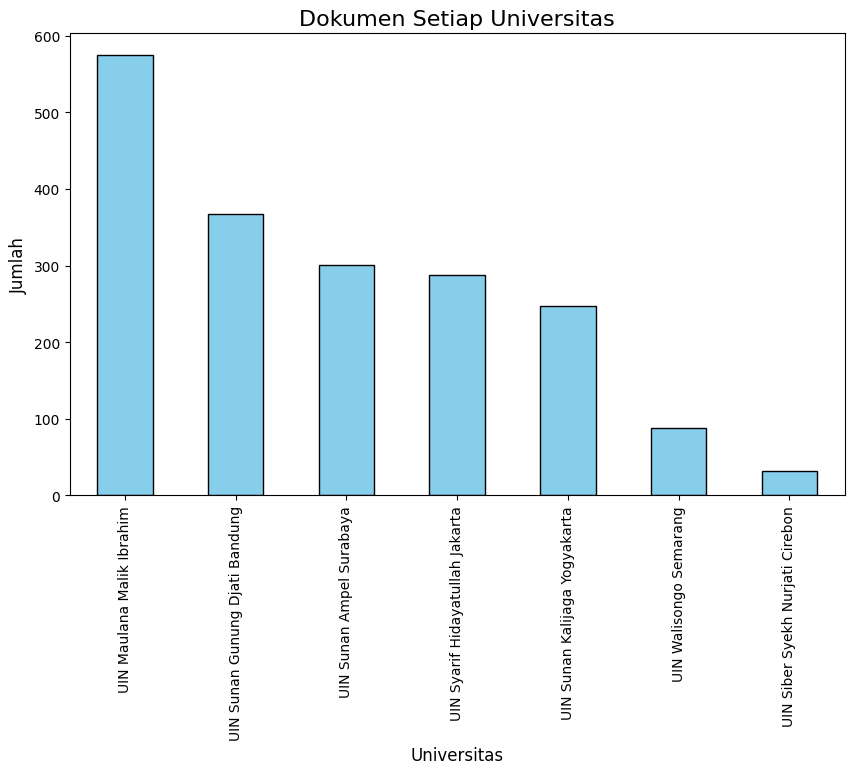

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
allDF['university'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Dokumen Setiap Universitas', fontsize=16)
plt.xlabel('Universitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

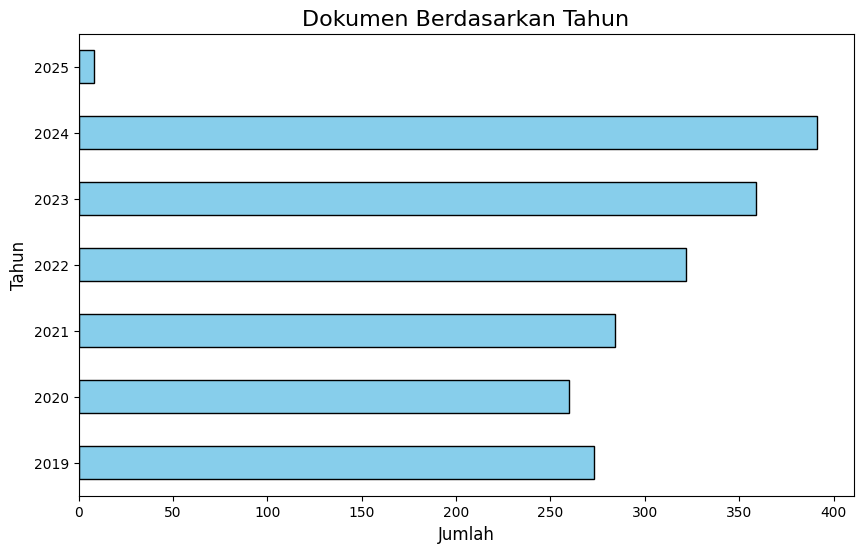

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
allDF['year'].value_counts().sort_index(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Dokumen Berdasarkan Tahun', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Tahun', fontsize=12)
plt.show()

## Translate 

In [31]:
!pip install deep-translator


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
from deep_translator import GoogleTranslator
from langdetect import detect

# Fungsi untuk deteksi & translate bahasa
def translate_to_indonesian(text):
    try:
        if detect(text) != 'id':  # Cek apakah bukan Bahasa Indonesia
            return GoogleTranslator(source='auto', target='id').translate(text)
        else:
            return text  # Kalau sudah Bahasa Indonesia, biarkan
    except:
        return text  # Kalau error, biarkan teks asli

In [19]:
# Terapkan ke field "abstrak"
UINSunanAmpel["abstract"] = UINSunanAmpel["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanAmpel2 = UINSunanAmpel.copy()

In [20]:
UINSunanGunungDjati["abstract"] = UINSunanGunungDjati["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanGunungDjati2 = UINSunanGunungDjati.copy()

In [21]:
UINSyahidHida["abstract"] = UINSyahidHida["abstract"].astype(str).apply(translate_to_indonesian)

UINSyahidHida2 = UINSyahidHida.copy()

In [22]:
UINSiberSandi["abstract"] = UINSiberSandi["abstract"].astype(str).apply(translate_to_indonesian)

UINSiberSandi2 = UINSiberSandi.copy()

In [23]:
UINSunanKalijaga["abstract"] = UINSunanKalijaga["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanKalijaga2 = UINSunanKalijaga.copy()

In [24]:
UINMaliki["abstract"] = UINMaliki["abstract"].astype(str).apply(translate_to_indonesian)

UINMaliki2 = UINMaliki.copy()

In [38]:
UINWalisongo["abstract"] = UINWalisongo["abstract"].astype(str).apply(translate_to_indonesian)

UINWalisongo2 = UINWalisongo.copy()

In [39]:
def translate_arab_to_indonesian(text):
    try:
        lang = detect(text)  # Deteksi bahasa
        if lang == 'ar':  # Jika bahasa Arab
            return GoogleTranslator(source='ar', target='id').translate(text)
        elif lang != 'id':  # Jika bukan Bahasa Indonesia atau Arab
            return GoogleTranslator(source='auto', target='id').translate(text)
        else:
            return text  # Jika sudah Bahasa Indonesia, biarkan
    except:
        return text  # Kalau error, biarkan teks asli

In [40]:
UINMaliki2["abstract"] = UINMaliki2["abstract"].astype(str).apply(translate_arab_to_indonesian)

UINMaliki3 = UINMaliki2.copy()

## Pre-processing

In [41]:
import re, string, unicodedata  #modul regular expression
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

#preprocessing
def removeStopword(stringText):
    # stop_list = ["sia"]
    stop_list = ["indonesia", "abstrak", "INDONESIA:", "ABSTRAK:", "abstrak:", "indonesia:", "ada", "lah", "adanya", "lain", "adalah", "lainnya", "adapun", "melainkan", "agak", "selaku", "agaknya", "lalu", "agar", "melalui", "akan", "terlalu", "akankah", "lama", "akhirnya", "lamanya", "aku", "selama", "akulah", "selama-lamanya", "amat", "selamanya", "amatlah", "lebih", "anda", "terlebih", "andalah", "bermacam", "antar", "bermacam-macam", "diantaranya", "macam", "antara", "semacam", "antaranya", "maka", "diantara", "makanya", "apa", "makin", "apaan", "malah", "mengapa", "malahan", "apabila", "mampu", "apakah", "mampukah", "apalagi", "mana", "apatah", "manakala", "atau", "manalagi", "ataukah", "masih", "ataupun", "masihkah", "bagai", "semasih", "bagaikan", "masing", "sebagai", "masing-masing", "sebagainya", "mau", "bagaimana", "maupun", "bagaimanapun", "semaunya", "sebagaimana", "memang", "bagaimanakah", "mereka", "bagi", "merekalah", "bahkan", "meski", "bahwa", "meskipun", "bahwasanya", "semula", "sebaliknya", "mungkin", "banyak", "mungkinkah", "sebanyak", "nah", "beberapa", "namun", "seberapa", "nanti", "begini", "nantinya", "beginian", "nyaris", "beginikah", "oleh", "beginilah", "olehnya", "sebegini", "seorang", "begitu", "seseorang", "begitukah", "pada", "begitulah", "padanya", "begitupun", "padahal", "sebegitu", "paling", "belum", "sepanjang", "belumlah", "pantas", "sebelum", "sepantasnya", "sebelumnya", "sepantasnyalah", "sebenarnya", "para", "berapa", "pasti", "berapakah", "pastilah", "berapalah", "per", "berapapun", "pernah", "betulkah", "pula", "sebetulnya", "pun", "biasa", "merupakan", "biasanya", "rupanya", "bila", "serupa", "bilakah", "saat", "bisa", "saatnya", "bisakah", "sesaat", "sebisanya", "saja", "boleh", "sajalah", "bolehkah", "saling", "bolehlah", "bersama", "buat", "bersama-sama", "bukan", "sama", "bukankah", "sama-sama", "bukanlah", "sesama", "bukannya", "sambil", "cuma", "sampai", "percuma", "sana", "dahulu", "sangat", "dalam", "sangatlah", "dan", "saya", "dapat", "sayalah", "dari", "se", "daripada", "sebab", "dekat", "sebabnya", "demi", "sebuah", "demikian", "tersebut", "demikianlah", "tersebutlah", "sedemikian", "sedang", "dengan", "sedangkan", "depan", "sedikit", "di", "sedikitnya", "dia", "segala", "dialah", "segalanya", "dini", "segera", "diri", "sesegera", "dirinya", "sejak", "terdiri", "sejenak", "dong", "sekali", "dulu", "sekalian", "enggak", "sekalipun", "enggaknya", "sesekali", "entah", "sekaligus", "entahlah", "sekarang", "terhadap", "sekarang", "terhadapnya", "sekitar", "hal", "sekitarnya", "hampir", "sela", "hanya", "selain", "hanyalah", "selalu", "harus", "seluruh", "haruslah", "seluruhnya", "harusnya", "semakin", "seharusnya", "sementara", "hendak", "sempat", "hendaklah", "semua", "hendaknya", "semuanya", "hingga", "sendiri", "sehingga", "sendirinya", "ia", "seolah", "ialah", "seolah-olah", "ibarat", "seperti", "ingin", "sepertinya", "inginkah", "sering", "inginkan", "seringnya", "ini", "serta", "inikah", "siapa", "inilah", "siapakah", "itu", "siapapun", "itukah", "disini", "itulah", "disinilah", "jangan", "sini", "jangankan", "sinilah", "janganlah", "sesuatu", "jika", "sesuatunya", "jikalau", "suatu", "juga", "sesudah", "justru", "sesudahnya", "kala", "sudah", "kalau", "sudahkah", "kalaulah", "sudahlah", "kalaupun", "supaya", "berkali-kali", "tadi", "sekali-kali", "tadinya", "kalian", "tak", "kami", "tanpa", "kamilah", "setelah", "kamu", "telah", "kamulah", "tentang", "kan", "tentu", "kapan", "tentulah", "kapankah", "tentunya", "kapanpun", "tertentu", "dikarenakan", "seterusnya", "karena", "tapi", "karenanya", "tetapi", "ke", "setiap", "kecil", "tiap", "kemudian", "setidak-tidaknya", "kenapa", "setidaknya", "kepada", "tidak", "kepadanya", "tidakkah", "ketika", "tidaklah", "seketika", "toh", "khususnya", "waduh", "kini", "wah", "kinilah", "wahai", "kiranya", "sewaktu", "sekiranya", "walau", "kita", "walaupun", "kitalah", "wong", "kok", "yaitu", "lagi", "yakni", "lagian", "yang", "berada", "masa", "keadaan", "semasa", "akhir", "masalah", "akhiri", "masalahnya", "berakhir", "termasuk", "berakhirlah", "semata", "berakhirnya", "semata-mata", "diakhiri", "diminta", "diakhirinya", "dimintai", "mengakhiri", "meminta", "terakhir", "memintakan", "artinya", "minta", "berarti", "mirip", "asal", "dimisalkan", "asalkan", "memisalkan", "atas", "misal", "awal", "misalkan", "awalnya", "misalnya", "berawal", "semisal", "berbagai", "semisalnya", "bagian", "bermula", "sebagian", "mula", "baik", "mulanya", "sebaik", "dimulai", "sebaik-baiknya", "dimulailah", "sebaiknya", "dimulainya", "bakal", "memulai", "bakalan", "mulai", "balik", "mulailah", "terbanyak", "dimungkinkan", "bapak", "kemungkinan", "baru", "kemungkinannya", "bawah", "memungkinkan", "belakang", "menaiki", "belakangan", "naik", "benar", "menanti", "benarkah", "menanti-nanti", "benarlah", "menantikan", "beri", "menyatakan", "berikan", "nyatanya", "diberi", "ternyata", "diberikan", "pak", "diberikannya", "panjang", "memberi", "dipastikan", "memberikan", "memastikan", "besar", "penting", "sebesar", "pentingnya", "betul", "diperlukan", "kebetulan", "diperlukannya", "dibuat", "memerlukan", "dibuatnya", "perlu", "diperbuat", "perlukah", "diperbuatnya", "perlunya", "membuat", "seperlunya", "memperbuat", "pertama", "bulan", "pertama-tama", "bung", "memihak", "cara", "pihak", "caranya", "pihaknya", "secara", "sepihak", "cukup", "pukul", "cukupkah", "dipunyai", "cukuplah", "mempunyai", "secukupnya", "punya", "terdahulu", "merasa", "didapat", "rasa", "mendapat", "rasanya", "mendapatkan", "terasa", "terdapat", "rata", "berdatangan", "berupa", "datang", "disampaikan", "didatangkan", "kesampaian", "mendatang", "menyampaikan", "mendatangi", "sampai-sampai", "mendatangkan", "sampaikan", "dua", "sesampai", "kedua", "tersampaikan", "keduanya", "menyangkut", "empat", "satu", "seenaknya", "disebut", "digunakan", "disebutkan", "dipergunakan", "disebutkannya", "guna", "menyebutkan", "gunakan", "sebut", "mempergunakan", "sebutlah", "menggunakan", "sebutnya", "hari", "keseluruhan", "berkehendak", "keseluruhannya", "menghendaki", "menyeluruh", "diibaratkan", "sendirian", "diibaratkannya", "bersiap", "ibaratkan", "bersiap-siap", "ibaratnya", "mempersiapkan", "mengibaratkan", "menyiapkan", "mengibaratkannya", "siap", "ibu", "dipersoalkan", "berikut", "mempersoalkan", "berikutnya", "persoalan", "ikut", "soal", "diingat", "soalnya", "diingatkan", "diketahui", "ingat", "diketahuinya", "ingat-ingat", "mengetahui", "mengingat", "tahu", "mengingatkan", "tahun", "seingat", "ditambahkan", "teringat", "menambahkan", "teringat-ingat", "tambah", "berkeinginan", "tambahnya", "diinginkan", "tampak", "keinginan", "tampaknya", "menginginkan", "ditandaskan", "jadi", "menandaskan", "jadilah", "tandas", "jadinya", "tandasnya", "menjadi", "bertanya", "terjadi", "bertanya-tanya", "terjadilah", "dipertanyakan", "terjadinya", "ditanya", "jauh", "ditanyai", "sejauh", "ditanyakan", "dijawab", "mempertanyakan", "jawab", "menanya", "jawaban", "menanyai", "jawabnya", "menanyakan", "menjawab", "pertanyaan", "dijelaskan", "pertanyakan", "dijelaskannya", "tanya", "jelas", "tanyakan", "jelaskan", "tanyanya", "jelaslah", "ditegaskan", "jelasnya", "menegaskan", "menjelaskan", "tegas", "berjumlah", "tegasnya", "jumlah", "setempat", "jumlahnya", "tempat", "sejumlah", "setengah", "sekadar", "tengah", "sekadarnya", "tepat", "kasus", "terus", "berkata", "tetap", "dikatakan", "setiba", "dikatakannya", "setibanya", "kata", "tiba", "katakan", "tiba-tiba", "katakanlah", "tiga", "katanya", "setinggi", "mengatakan", "tinggi", "mengatakannya", "ditujukan", "sekecil", "menuju", "keluar", "tertuju", "kembali", "ditunjuk", "berkenaan", "ditunjuki", "mengenai", "ditunjukkan", "bekerja", "ditunjukkannya", "dikerjakan", "ditunjuknya", "mengerjakan", "menunjuk", "dikira", "menunjuki", "diperkirakan", "menunjukkan", "kira", "menunjuknya", "kira-kira", "tunjuk", "memperkirakan", "berturut", "mengira", "berturut-turut", "terkira", "menurut", "kurang", "turut", "sekurang", "bertutur-tutur", "sekurangnya", "dituturkan", "berlainan", "dituturkannya", "dilakukan", "menuturkan", "melakukan", "tutur", "berlalu", "tuturnya", "dilalui", "diucapkan", "keterlaluan", "diucapkannya", "kelamaan", "mengucapkan", "berlangsung", "mengucapkannya", "lanjut", "ucap", "lanjutnya", "ucapnya", "selanjutnya", "berujar", "berlebihan", "ujar", "lewat", "ujarnya", "dilihat", "umum", "diperlihatkan", "umumnya", "kelihatan", "diungkapkan", "kelihatannya", "mengungkapkan", "melihat", "ungkap", "melihatnya", "ungkapnya", "memperlihatkan", "untuk", "terlihat", "usah", "kelima", "seusai", "lima", "usai", "luar", "terutama", "bermaksud", "waktu", "dimaksud", "waktunya", "dimaksudkan", "meyakini", "dimaksudkannya", "meyakinkan", "dimaksudnya", "yakin", "semampu", "semampunya"]
    stop_words = set(stopwords.words('indonesian')).union(stop_list)
    word_tokens = word_tokenize(stringText)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = [w for w in filtered_sentence if len(w) > 3]
    # return ' '.join(filtered_sentence)
    return filtered_sentence

#remove sentence which contains only one word
def removeSentence(stringText):
    word = stringText.split()
    wordCount = len(word)
    if(wordCount<=1):
        stringText = ''
    return stringText

def cleaning(stringText):
    #remove non-ascii
    stringText = unicodedata.normalize('NFKD', stringText).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    stringText = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', stringText)
    #remove punctuations
    stringText = re.sub(r'[^\w]|_',' ',stringText)
    #remove digit from stringTexting
    stringText = re.sub(r"\S*\d\S*", "", stringText).strip()
    #remove digit or numbers
    stringText = re.sub(r"\b\d+\b", " ", stringText)
    #to lowercase
    stringText = stringText.lower()
    #Remove additional white spaces
    stringText = re.sub(r'[\s]+', ' ', stringText)
    return stringText

def preprocessing(stringText):
    stringText = removeSentence(stringText)
    stringText = cleaning(stringText)
    stringText = removeStopword(stringText)
    stringText = [stemmed_wrapper(word) for word in stringText]
    return " ".join(stringText)

### UIN Sunan Ampel 

In [42]:
len(UINSunanAmpel2)

301

In [43]:
UINSunanAmpel2["abstract"] = UINSunanAmpel2["abstract"].apply(preprocessing)

In [45]:
UINSunanAmpel2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanAmpel.csv', index=False)

### UIN Sunan Gunung DJati

In [46]:
len(UINSunanGunungDjati2)

367

In [47]:
print(UINSunanGunungDjati2["abstract"].isnull().sum())  # Cek jumlah NaN
print(UINSunanGunungDjati2["abstract"].dtypes)  # Cek tipe data

UINSunanGunungDjati2["abstract"] = UINSunanGunungDjati2["abstract"].fillna("").apply(preprocessing)

0
object


In [48]:
UINSunanGunungDjati2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanGunungDjati.csv', index=False)

### UIN Syarif Hidayatullah

In [49]:
len(UINSyahidHida2)

288

In [50]:
UINSyahidHida2["abstract"] = UINSyahidHida2["abstract"].apply(preprocessing)

In [51]:
UINSyahidHida2.to_csv(f'{dir}/preprocessing/preprocessing_UINSyarifHidayatullah.csv', index=False)

### UIN Siber Syekh Nurjati

In [52]:
len(UINSiberSandi2)

32

In [53]:
UINSiberSandi2["abstract"] = UINSiberSandi2["abstract"].apply(preprocessing)

In [54]:
UINSiberSandi2.to_csv(f'{dir}/preprocessing/preprocessing_UINSiberSyekhNurjati.csv', index=False)

### UIN Sunan Kalijaga

In [55]:
len(UINSunanKalijaga2)

247

In [56]:
print(UINSunanKalijaga2["abstract"].isnull().sum())  # Cek jumlah NaN
print(UINSunanKalijaga2["abstract"].dtypes)  # Cek tipe data

UINSunanKalijaga2["abstract"] = UINSunanKalijaga2["abstract"].fillna("").apply(preprocessing)

0
object


In [57]:
UINSunanKalijaga2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanKalijaga.csv', index=False)

### UIN Maulana Malik Ibrahim 

In [58]:
len(UINMaliki3)

574

In [59]:
UINMaliki3["abstract"] = UINMaliki3["abstract"].apply(preprocessing)

In [60]:
UINMaliki3.to_csv(f'{dir}/preprocessing/preprocessing_UINMaulanaMalik.csv', index=False)

### UIN Walisongo

In [61]:
len(UINWalisongo2)

88

In [62]:
UINWalisongo2["abstract"] = UINWalisongo2["abstract"].apply(preprocessing)

In [63]:
UINWalisongo2.to_csv(f'{dir}/preprocessing/preprocessing_UINWalisongo.csv', index=False)